<a href="https://colab.research.google.com/github/shrimp0000/Data-Science-Project/blob/main/Lending_Club_Loan_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Prepare data

In [ ]:
# Set global random seed for reproducibility
RAND_SEED = 15524718

## 1.1. Connect to Kaggle

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nyunuolei","key":"8ac9cf8d6e0bf08b2776080d910b4696"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                             title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                       COVID-19 Dataset                                   5MB  2022-11-13 15:47:17          10777        316  1.0              
michals22/coffee-dataset                                        Coffee dataset                                    24KB  2022-12-15 20:02:12           1776         52  1.0              
thedevastator/jobs-dataset-from-glassdoor                       Salary Prediction                                  3MB  2022-11-16 13:52:31           6727        149  1.0              
thedevastator/unlock-profits-with-e-commerce-sales-data         E-Commerce 

## 1.2. Download dataset

In [ ]:
! kaggle datasets download -d jeandedieunyandwi/lending-club-dataset

 62% 17.0M/27.6M [00:00<00:00, 46.4MB/s]
100% 27.6M/27.6M [00:00<00:00, 59.0MB/s]


In [ ]:
! mkdir lending-club-dataset

mkdir: cannot create directory ‘lending-club-dataset’: File exists


In [ ]:
# ! rm -r lending-club-dataset/

In [ ]:
! unzip lending-club-dataset.zip -d lending-club-dateset

Archive:  lending-club-dataset.zip
  inflating: lending-club-dateset/lending_club_loan_two.csv  


## 1.3. Load data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("/content/lending-club-dateset/lending_club_loan_two.csv")
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
data['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [ ]:
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [ ]:
data.nunique()

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48817
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

## 1.4. Feature explaination

In [ ]:
data_description = pd.read_excel('https://resources.lendingclub.com/LCDataDictionary.xlsx')

In [ ]:
pd.set_option('display.max_rows', None)
data_description[data_description['LoanStatNew'].isin(data.columns)]

,LoanStatNew,Description
4,annual_inc,The self-reported annual income provided by th...
6,application_type,Indicates whether the loan is an individual ap...
16,dti,A ratio calculated using the borrower’s total ...
18,earliest_cr_line,The month the borrower's earliest reported cre...
19,emp_length,Employment length in years. Possible values ar...
20,emp_title,The job title supplied by the Borrower when ap...
25,grade,LC assigned loan grade
26,home_ownership,The home ownership status provided by the borr...
29,initial_list_status,The initial listing status of the loan. Possib...
33,installment,The monthly payment owed by the borrower if th...


In [ ]:
pd.set_option('display.max_rows', 10)

# 2. Inference


In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import statistics

In [ ]:
data_accepted=data.copy()

In [ ]:
data_accepted.dropna(inplace=True)

In [ ]:
data_accepted.shape

In [ ]:
data_accepted['zipcode']=data_accepted.address.apply(lambda x:x[-5:])#convert address to zipcode

In [ ]:
plt.hist(data_accepted['zipcode'])#histogram for zipcode

In [ ]:
plt.hist(data_accepted['loan_amnt'])#histogram for loan amount

In [ ]:
data_accepted['x']=0 #convert zipcode to categorical

In [ ]:
data_accepted['x'] = data_accepted['zipcode'].astype('category')

In [ ]:
data_accepted['x'] = data_accepted['x'].cat.codes

In [ ]:
data_accepted['x']=data_accepted['x'].astype('int')

In [ ]:
test2=data_accepted[['x','loan_amnt']]

In [ ]:
#check for variance
var=[]
for i in range(0,10):
    a=test2.loc[(test2['x']==i)]
    v=np.var(a.iloc[:,1])
    var=np.append(var,v)

In [ ]:
#plot of variance, we can see that the difference of variences are less than 5%
var=var/var[0]
x=np.linspace(0,9,10)
plt.plot(x,var)

In [ ]:
#do t-test
pvalue2=[]
statistics2=[]
cohend2=[]
ci2=[]

In [ ]:
for i in range(0,10):
    for j in range(0,10):
        c=test2.loc[(test2['x']==i)].iloc[:,1]
        d=test2.loc[(test2['x']==j)].iloc[:,1]
        s2,p2=stats.ttest_ind(c, d)
        degrees_of_freedom = len(c) + len(d) - 2
        statistics2=np.append(statistics2,s2)
        mean1, std1 = np.mean(c), np.std(d)
        mean2, std2 = np.mean(d), np.std(d)
        n1, n2 = len(c), len(d)
        pooled_std = np.sqrt(((n1 - 1) * std1 ** 2 + (n2 - 1) * std2 ** 2) / (n1 + n2 - 2))
        cohen_d = (mean1 - mean2) / pooled_std
        ci = stats.t.interval(0.95, degrees_of_freedom, loc=s2, scale=1)
        ci2=np.append(ci2,ci)
        cohend2=np.append(cohend2,cohen_d)
        pvalue2=np.append(pvalue2,p2)


In [ ]:
ci2 = stats.t.interval(0.95, degrees_of_freedom, loc=statistics2, scale=1)

In [ ]:
ci2 = stats.t.interval(0.95, degrees_of_freedom, loc=statistics2, scale=1)

In [ ]:
lowerci = np.delete(ci2[0], slice(0, ci2[0].size, 11))
upperci= np.delete(ci2[1], slice(0, ci2[1].size, 11))

In [ ]:
statistics2=np.delete(statistics2, slice(0, statistics2.size, 11))

In [ ]:
cohend2=np.sort(cohend2)
cohend2=cohend2[np.where(cohend2!=0)]

In [ ]:
pvalue2=np.sort(pvalue2)
pvalue2=pvalue2[0:90]

In [ ]:
#graph with 0.05 threshold
x=np.linspace(0,1,len(pvalue2))
p=np.linspace(0.05,0.05,len(pvalue2))
plt.plot(x,pvalue2,label='ttest Pvalue')
plt.plot(x,p,label='0.05 threshold')
plt.title('test p-value with threshold')
plt.legend()
plt.savefig("pthres.svg", dpi=300)

In [ ]:
#graph of cohen_d
plt.plot(x,cohend2,label='ttest cohend')
plt.title('cohen_d for the test')
plt.legend()
plt.savefig("cohend.svg", dpi=300)

In [ ]:
#graph for CI
fig, ax = plt.subplots()
ax.plot(x,np.sort(statistics2))
ax.fill_between(x, np.sort(lowerci), np.sort(upperci), color='b', alpha=.1)
plt.savefig("CI.svg", dpi=300)

In [ ]:
#histogram of p-value
xbin=[0.05,0.2,0.4,0.6,0.8,1]
plt.hist(pvalue2,bins=20)
plt.title('histogram of p-value')
plt.xticks(xbin)
plt.savefig("phist.svg", dpi=300)

In [ ]:
 #Calculate for the proportion of significant p-values
len(np.where(pvalue2<0.05)[0])/len(pvalue2)

# 3. Prediction

Main question: Can we use the borrower's annual income to predict its expected loan amount, while controlling for confounding factors like the credit revolving balance($revol\_bal$), the number of public record bankruptcies($pub\_rec\_bankruptcies$), and etc.?

## 3.1 Data exploration


Select only numeric features for regression

In [ ]:
data = data.dropna()

In [ ]:
data_numeric = data.select_dtypes('float64')
data_numeric.head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0


Explore data correlation

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

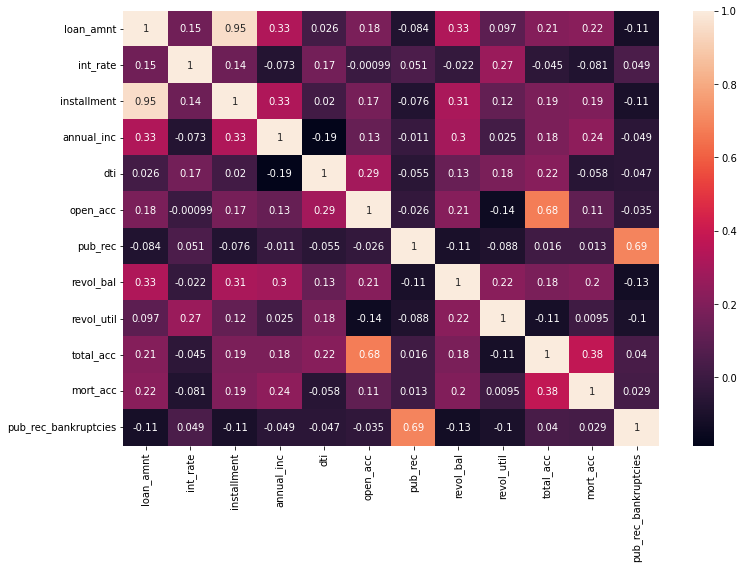

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data_numeric.corr(), annot=True)
plt.savefig("Correlation matrix.svg")
plt.show()

We can conclude from the plot above that features `loan_amnt` and `installment` are **highly correlated.**

But actually they contain the same information.

loan_amnt is the amount of the loan of each borrower, which determines the monthly installment. 

So we should delete `installment` from our predictor.

Also, `total_acc` contains `open_acc` and `mort_acc`, `pub_rec` contains `pub_rec_bankruptcies`. So to avoid multicolinearity, we delete `total_acc` and `pub_rec`.

## Regression

*   Target: `loan_amnt`
*   Predictor: 'int_rate', 'annual_inc', 'dti', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc','pub_rec_bankruptcies'





In [ ]:
import statsmodels.api as sm

In [ ]:
data_numeric.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [ ]:
y,X = data_numeric['loan_amnt'], data_numeric[['int_rate', 'annual_inc', 'dti', 'open_acc',
       'revol_bal', 'revol_util', 'mort_acc',
       'pub_rec_bankruptcies']]

Train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RAND_SEED)

Scale

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Multiple regression

In [ ]:
from sklearn import linear_model

In [ ]:
multi_reg = linear_model.LinearRegression()
multi_reg.fit(X_train, y_train)

LinearRegression()

Result

In [ ]:
multi_reg.score(X_train, y_train)

0.23025517124290662

In [ ]:
multi_reg.score(X_test, y_test)

0.23167395865154605

Ridge regression

In [ ]:
ridge_reg = linear_model.Ridge(alpha = 100, random_state = RAND_SEED )
ridge_reg.fit(X_train, y_train)

Ridge(alpha=100, random_state=15524718)

Result

In [ ]:
ridge_reg.score(X_train, y_train)

0.2302551517185626

In [ ]:
ridge_reg.score(X_test, y_test)

0.23167263398231586

Lasso regression

In [ ]:
lasso_reg = linear_model.Lasso(alpha = 10, random_state = RAND_SEED)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=10, random_state=15524718)

Result

In [ ]:
lasso_reg.score(X_train, y_train)

0.23024530152300327

In [ ]:
lasso_reg.score(X_test, y_test)

0.2316292203153636

ANN

In [ ]:
from sklearn.neural_network import MLPRegressor
import pickle

In [ ]:
# ANN takes a long time to train, so we saved a copy of trained model.

ANN = MLPRegressor(random_state=RAND_SEED, max_iter=500, verbose=True, early_stopping=True)
ANN.fit(X_train, y_train)

with open('ANN.pickle', 'wb') as handle:
  pickle.dump(ANN, handle)

Iteration 1, loss = 137533599.60449293
Validation score: -2.754358
Iteration 2, loss = 122434138.43807159
Validation score: -2.188829
Iteration 3, loss = 101074016.63956179
Validation score: -1.585754
Iteration 4, loss = 80722358.75267938
Validation score: -1.075680
Iteration 5, loss = 64332964.77877838
Validation score: -0.690500
Iteration 6, loss = 52381147.73270466
Validation score: -0.414325
Iteration 7, loss = 44242647.37671021
Validation score: -0.230078
Iteration 8, loss = 38961126.20098945
Validation score: -0.108624
Iteration 9, loss = 35674851.01513932
Validation score: -0.031321
Iteration 10, loss = 33607276.11687464
Validation score: 0.021794
Iteration 11, loss = 32097975.69580084
Validation score: 0.063984
Iteration 12, loss = 30875298.00748445
Validation score: 0.098228
Iteration 13, loss = 29876736.75362754
Validation score: 0.125998
Iteration 14, loss = 29090281.08054716
Validation score: 0.147138
Iteration 15, loss = 28495681.14742107
Validation score: 0.162779
Iterati

In [ ]:
with open('ANN.pickle', 'rb') as handle:
  ANN = pickle.load(handle)

Result

In [ ]:
ANN.score(X_train,y_train)

0.41013166366058895

In [ ]:
ANN.score(X_test, y_test)

0.41054741164851616

Result analysis

In [ ]:
y_preds = [multi_reg.predict(X_test), ridge_reg.predict(X_test), lasso_reg.predict(X_test), ANN.predict(X_test)]
Rsquares = [multi_reg.score(X_test,y_test), ridge_reg.score(X_test,y_test), lasso_reg.score(X_test,y_test), ANN.score(X_test,y_test)]

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
RMSEs = [mean_squared_error(y_pred,y_test, squared=False) for y_pred in y_preds]

In [ ]:
residuals = [y_pred - y_test for y_pred in y_preds]

In [ ]:
import seaborn as sns

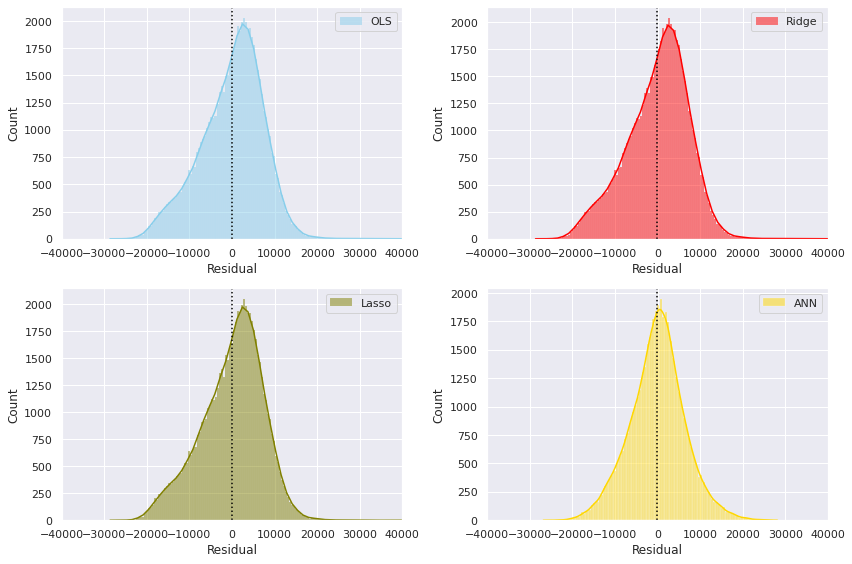

In [ ]:
sns.set(style="darkgrid")
# df = sns.load_dataset("iris")
colors = ['skyblue','red','olive','gold']
labels = ['OLS','Ridge','Lasso','ANN']
fig, axs = plt.subplots(2, 2, figsize=(12,8))
for idx,r in enumerate(residuals):
  # sns.histplot(data=df, x="sepal_length", color="skyblue", label="Sepal Length", kde=True)
  sns.histplot(data=r, alpha =0.5, color = colors[idx], label = labels[idx],kde=True, ax=axs[idx//2, idx%2])
  axs[idx//2, idx%2].axvline(np.mean(r), color = 'black', ls=':')
  
  axs[idx//2, idx%2].set_xlim(-40000,40000)
  axs[idx//2, idx%2].legend()
  axs[idx//2, idx%2].set_xlabel('Residual')

plt.tight_layout()
plt.savefig("Residual distribution.svg")
plt.show()

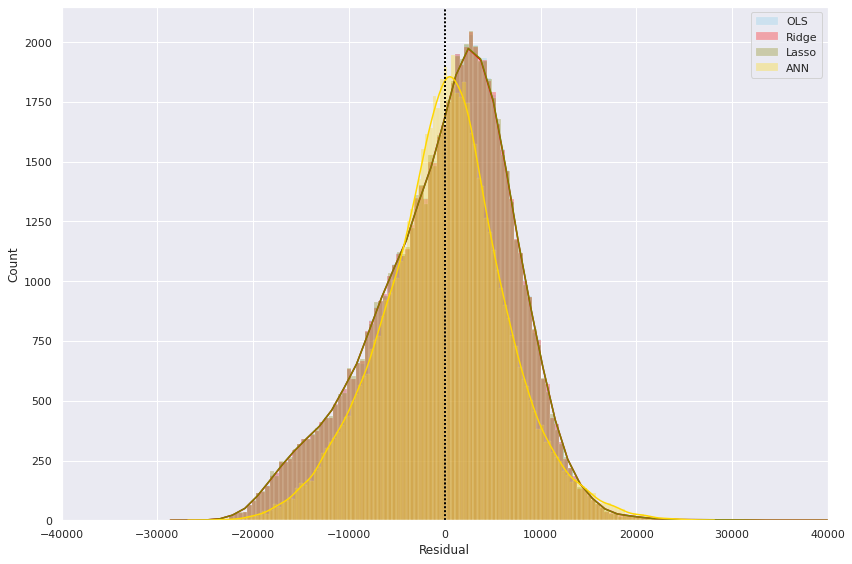

In [ ]:
plt.figure(figsize=(12, 8))
for idx in [0,1,2,3]:
  # sns.histplot(data=df, x="sepal_length", color="skyblue", label="Sepal Length", kde=True)
  sns.histplot(data=residuals[idx], alpha =0.3, color = colors[idx], label = labels[idx], kde=True)
  plt.axvline(np.mean(residuals[idx]), ls=':', color = 'black')
plt.xlabel('Residual')
plt.xlim(-40000,40000)
plt.legend()
plt.tight_layout()
plt.savefig("Combined residual distribution.svg")
plt.show()

In [ ]:
import statsmodels.api as sm

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RAND_SEED)
X_train_sm = sm.add_constant(pd.DataFrame(X_train, columns = X.columns)).reset_index(drop=True)
y_train_sm = pd.DataFrame(y_train, columns = ['loan_amnt']).reset_index(drop=True)
#fit linear regression model
model = sm.OLS(y_train_sm, X_train_sm).fit()

#view model summary
print(model.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:              loan_amnt   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                 1.005e+04
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        03:58:25   Log-Likelihood:            -2.7732e+06
No. Observations:              268694   AIC:                         5.546e+06
Df Residuals:                  268685   BIC:                         5.547e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3621.2447 

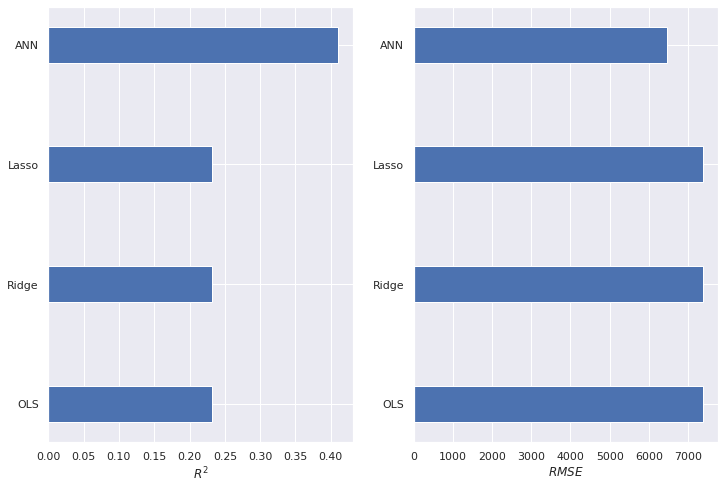

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12,8))

axs[0].barh(labels, Rsquares, height = 0.3)
axs[0].set_xlabel("$R^2$")

axs[1].barh(labels, RMSEs, height = 0.3)
axs[1].set_xlabel("$RMSE$")

plt.savefig("Prediction results.svg")
plt.show()


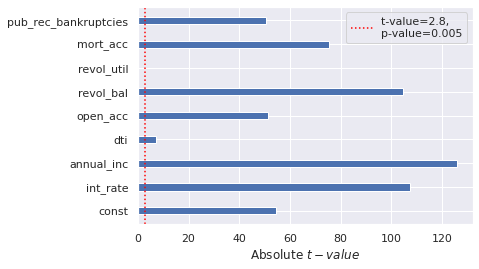

In [ ]:
plt.barh(model.tvalues.index, abs(model.tvalues.values), height = 0.3)
plt.xlabel("Absolute $t-value$")
plt.axvline(2.807, ls=':', color = 'red', label='t-value=2.8, \np-value=0.005')
plt.legend()
plt.savefig("The absolute t-values of multiple regression.svg")
plt.show()


# 4. Clustering

In [ ]:
data

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [ ]:
description_df = data.drop(['issue_d', 'installment', 'emp_title', 'title', 'address', 'grade'], axis=1)
description_df.dropna(inplace=True)

In [ ]:
description_df.describe()

,loan_amnt,int_rate,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,340775.000000,340775.000000,3.407750e+05,340775.000000,340775.000000,340775.000000,3.407750e+05,340775.000000,340775.000000,340775.000000,340775.000000
mean,14542.051647,13.799587,7.600978e+04,17.692083,11.585574,0.185603,1.622684e+04,54.355115,25.834157,1.805282,0.125508
std,8401.453461,4.509504,6.210575e+04,8.154273,5.179239,0.545558,2.114298e+04,23.971283,11.898221,2.143777,0.362347
min,1000.000000,5.320000,5.000000e+03,0.000000,1.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.640000,4.700000e+04,11.600000,8.000000,0.000000,6.302000e+03,36.900000,17.000000,0.000000,0.000000
50%,12500.000000,13.350000,6.500000e+04,17.220000,11.000000,0.000000,1.148700e+04,55.300000,24.000000,1.000000,0.000000
75%,20000.000000,16.780000,9.000000e+04,23.390000,14.000000,0.000000,2.001550e+04,73.000000,33.000000,3.000000,0.000000
max,40000.000000,30.990000,8.706582e+06,380.530000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [ ]:
num_cols = []

for col in description_df.columns:
  if description_df[col].dtype == "float64":
    num_cols.append(col)

num_cols

['loan_amnt',
 'int_rate',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies']

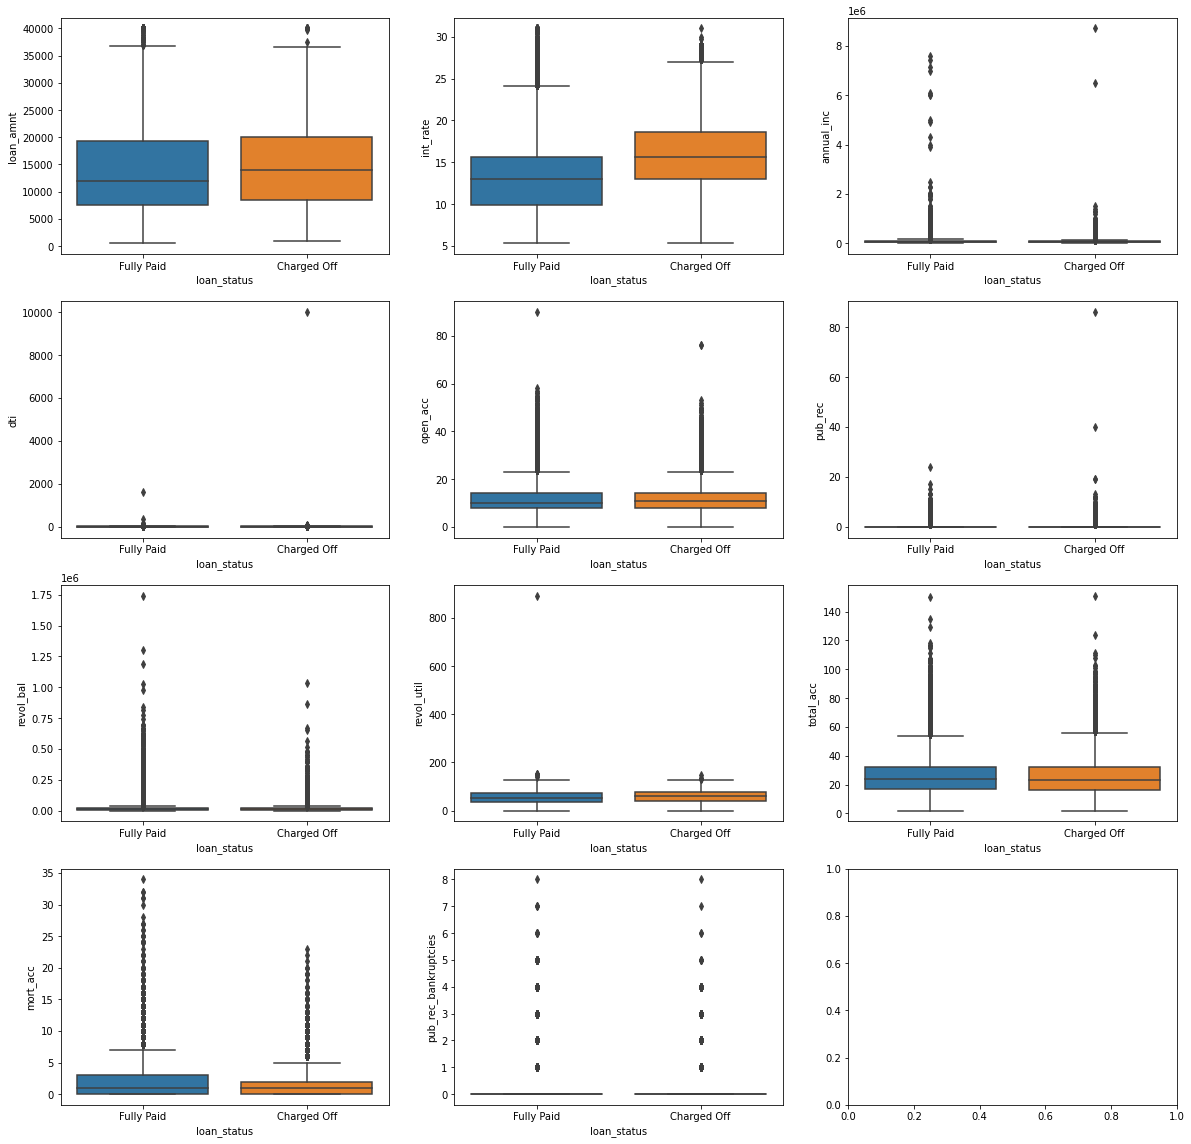

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

_,ax1 = plt.subplots(4, 3, figsize=[20,20])

for i, col in enumerate(num_cols):
  sns.boxplot(x='loan_status', y=col, data=data, ax=ax1[i//3][i%3])

In [ ]:
pd.set_option('display.max_columns', 500)

In [ ]:
data_num = data.copy()

data_num = data_num.drop(['issue_d', 'installment', 'emp_title', 'title', 'address', 'grade'], axis=1)

data_num.earliest_cr_line = data.earliest_cr_line.apply(lambda x: int(x[-4:]))

data_num.mort_acc.fillna(0, inplace=True)

# data_num['zip_code'] = data.address.apply(lambda x: x[-5:])

categories = ['home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type']
data_num = pd.get_dummies(data_num, columns=categories, drop_first=True)

data_num.term = pd.to_numeric(data.term.astype(str).str.replace(' months', ''))

data_num.sub_grade = data.sub_grade.astype(str).apply(lambda s: (ord(s[0]) - ord('A')) * 5 + int(s[1]) - 1).astype(int)

### check if we can change 10+ years to 10, and <1 years to 0
year_10_plus = data[data["emp_length"] == '10+ years']['loan_status'].value_counts().values
print("10+ years:")
print(year_10_plus[0] / year_10_plus.sum())

year_9 = data[data["emp_length"] == '9 years']['loan_status'].value_counts().values
print("9 years:")
print(year_9[0] / year_9.sum())

year_8 = data[data["emp_length"] == '8 years']['loan_status'].value_counts().values
print("8 years:")
print(year_8[0] / year_8.sum())

print("10+ years does not have much diff in fully paid rate than 9 and 8 years, so take 10+ as 10 years")
print()

year_1_less = data[data["emp_length"] == '< 1 year']['loan_status'].value_counts().values
print("< 1 years:")
print(year_1_less[0] / year_1_less.sum())

year_1 = data[data["emp_length"] == '1 year']['loan_status'].value_counts().values
print("1 year:")
print(year_1[0] / year_1.sum())

year_2 = data[data["emp_length"] == '2 years']['loan_status'].value_counts().values
print("2 years:")
print(year_2[0] / year_2.sum())

print("similarly, take < 1 as 0 years")
###

dct = {}
for i in range(2, 10):
  dct['{} years'.format(i)] = i
dct['< 1 year'] = 0
dct['1 year'] = 1
dct['10+ years'] = 10
dct[np.nan] = 0

data_num.emp_length = data.emp_length.map(dct)

data_num.loan_status = data.loan_status.map({'Fully Paid': 0, 'Charged Off': 1})

10+ years:
0.8158139018255964
9 years:
0.7995298419746637
8 years:
0.8002399833055092
10+ years does not have much diff in fully paid rate than 9 and 8 years, so take 10+ as 10 years

< 1 years:
0.7931284475965327
1 year:
0.8008654663472684
2 years:
0.8067379350768973
similarly, take < 1 as 0 years


In [ ]:
data_num

,loan_amnt,term,int_rate,sub_grade,emp_length,annual_inc,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT
0,10000.0,36,11.44,8,10,117000.0,0,26.24,1990,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
1,8000.0,36,11.99,9,4,65000.0,0,22.05,2004,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,15600.0,36,10.49,7,0,43057.0,0,12.79,2007,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,7200.0,36,6.49,1,6,54000.0,0,2.60,2006,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,24375.0,60,17.27,14,9,55000.0,1,33.95,1999,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,8,2,40000.0,0,15.63,2004,6.0,0.0,1990.0,34.3,23.0,0.0,0.0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
396026,21000.0,36,12.29,10,5,110000.0,0,21.45,2006,6.0,0.0,43263.0,95.7,8.0,1.0,0.0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
396027,5000.0,36,9.99,5,10,56500.0,0,17.56,1997,15.0,0.0,32704.0,66.9,23.0,0.0,0.0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
396028,21000.0,60,15.31,11,10,64000.0,0,15.88,1990,9.0,0.0,15704.0,53.8,20.0,5.0,0.0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data_num.dropna(), test_size=0.2, random_state=RAND_SEED)

In [ ]:
X_train, y_train = data_train.drop('loan_status', axis=1), data_train.loan_status
X_test, y_test = data_test.drop('loan_status', axis=1), data_test.loan_status

In [ ]:
X_train["loan_amnt"].values[500]

8875.0

In [ ]:
X_train

,loan_amnt,term,int_rate,sub_grade,emp_length,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT
326379,26375.0,60,18.25,16,10,59000.0,11.23,1994,14.0,0.0,10217.0,24.7,19.0,2.0,0.0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
350851,8000.0,36,12.99,9,4,52000.0,31.16,2003,9.0,0.0,8154.0,60.9,20.0,0.0,0.0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
254759,3600.0,36,18.84,21,10,92000.0,9.61,2007,8.0,0.0,8936.0,88.5,12.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
130949,3000.0,36,13.11,8,3,65000.0,8.58,1987,8.0,0.0,3194.0,23.0,12.0,1.0,0.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
283495,13200.0,36,16.99,15,0,30000.0,31.04,2003,10.0,1.0,10686.0,47.3,21.0,0.0,1.0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188162,3000.0,36,8.90,4,9,65000.0,14.16,1991,13.0,0.0,15862.0,38.4,22.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
29985,30000.0,60,12.42,8,10,50400.0,19.88,1996,7.0,0.0,6278.0,55.6,22.0,0.0,0.0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
46474,15000.0,36,14.27,11,6,40000.0,17.46,1994,9.0,0.0,8175.0,77.1,30.0,0.0,0.0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
188411,17500.0,36,11.67,8,0,68000.0,4.80,1996,7.0,0.0,6722.0,40.7,25.0,10.0,0.0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_clst = scaler.transform(X_train)

## Kmeans


In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances

scores = []
best_score = 0
best_k = 0

for i in range(2, 11):
  kmeans_model = KMeans(n_clusters=i, random_state=RAND_SEED).fit(X_clst)
  labels = kmeans_model.labels_
  this_score = metrics.silhouette_score(X_clst, labels, metric='euclidean')
  if this_score > best_score:
    best_score = this_score
    best_k = i
  scores.append(this_score)

print(f"best k is: {best_k}")
print(f"best silhouette score is: {best_score}")

best k is: 10
best silhouette score is: 0.10449035968793047


In [ ]:
print(scores)

[0.0900994348148139, 0.08071522763110994, 0.08277577418845224, 0.07466277606360588, 0.09512299016751477, 0.10198766592463789, 0.08747362588581693, 0.09467436350991387, 0.10449035968793047]


In [ ]:
for i in range(11, 16):
  kmeans_model = KMeans(n_clusters=i, random_state=RAND_SEED).fit(X_clst)
  labels = kmeans_model.labels_
  this_score = metrics.silhouette_score(X_clst, labels, metric='euclidean')
  if this_score > best_score:
    best_score = this_score
    best_k = i
  scores.append(this_score)

In [ ]:
print(f"best k is: {best_k}")
print(f"best silhouette score is: {best_score}")

best k is: 14
best silhouette score is: 0.1290853134138669


In [ ]:
kmeans = KMeans(n_clusters=best_k, random_state=RAND_SEED).fit(X_clst)

In [ ]:
clusters = kmeans.labels_.tolist()
# clst_data_transpose["cluster"] = clusters
# clst_data_transpose["cluster"].value_counts()
clst_df = X_train.copy()
clst_df["cluster"] = clusters
clst_df["cluster"].value_counts()

12    87529
2     67611
9     66090
7     40190
11    21433
0     21407
6      7310
3      2164
4      1878
5       265
13      260
10       29
1         5
8         4
Name: cluster, dtype: int64

In [ ]:
clst_df["cluster"].to_csv('cluster.csv') 

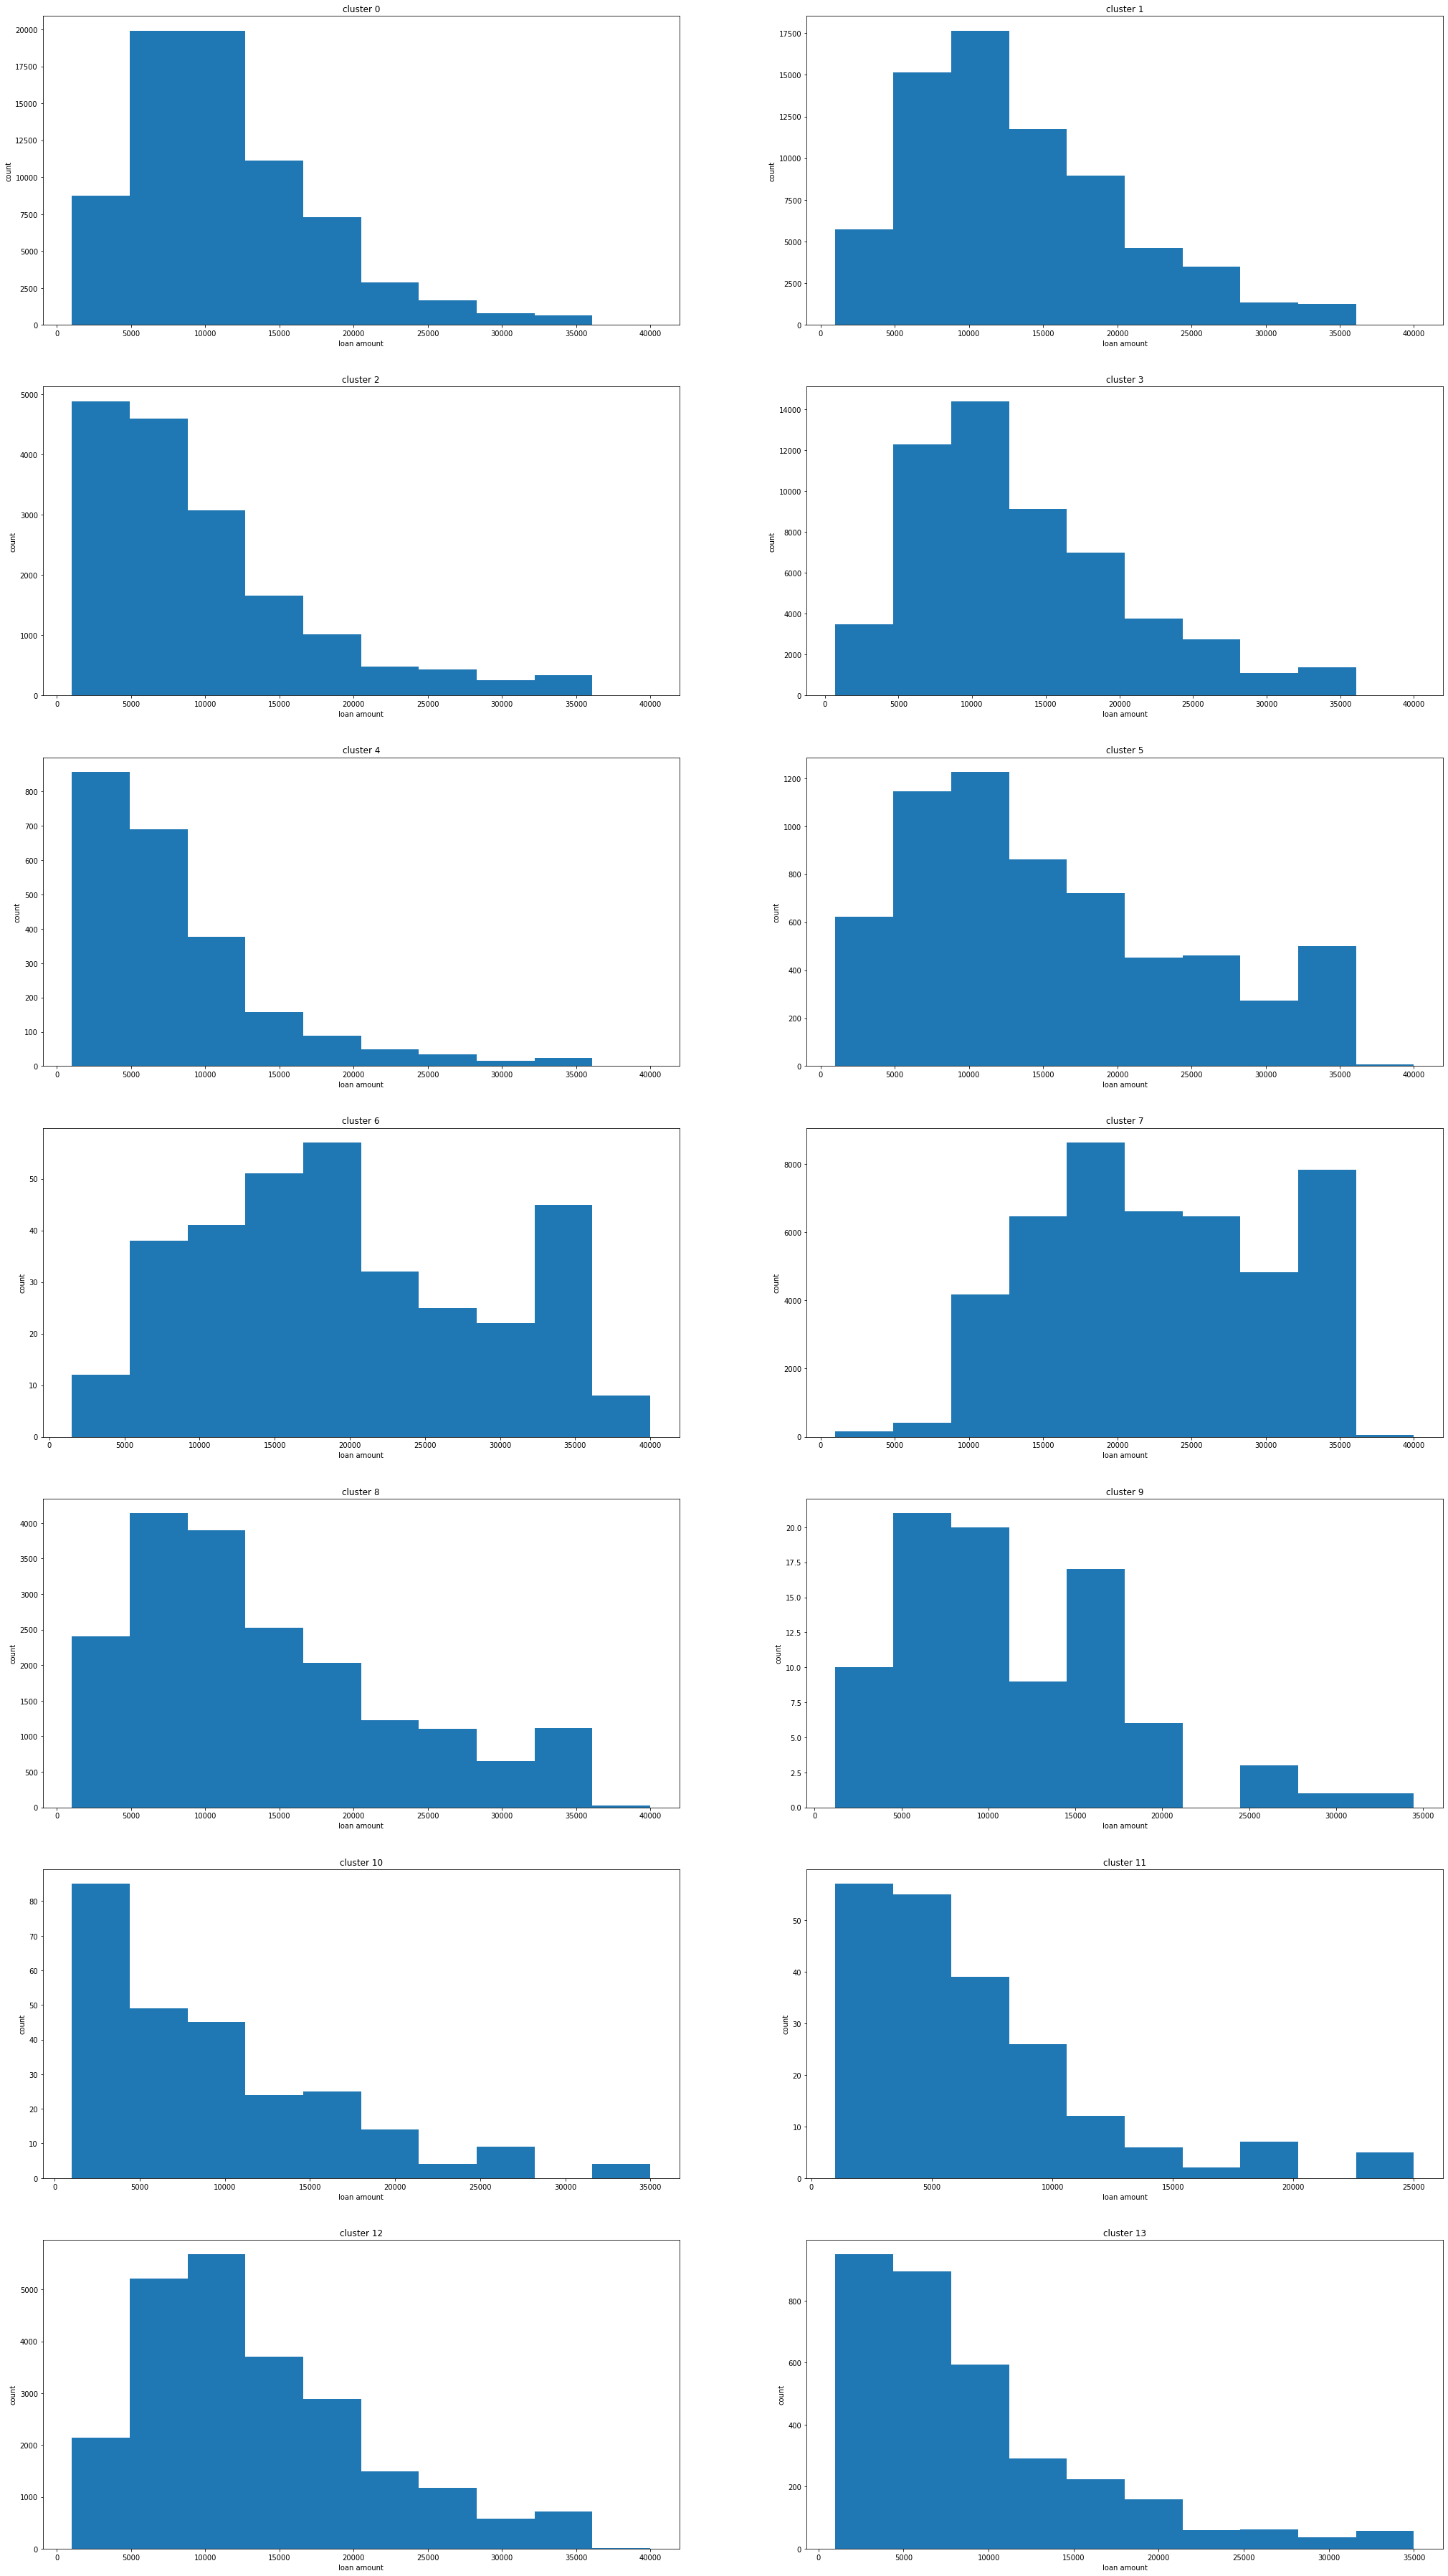

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# invalid_clsts = [6, 9, 10, 11]

start = 1
plt.figure(figsize=(35, 65))
for i in sorted(clst_df["cluster"].unique()):
  # if i not in invalid_clsts:
  plt.subplot(7, 2, start)
  start += 1
  plt.hist(clst_df[clst_df["cluster"] == i]["loan_amnt"])
  plt.title(f"cluster {i}")
  plt.xlabel("loan amount")
  plt.ylabel("count")

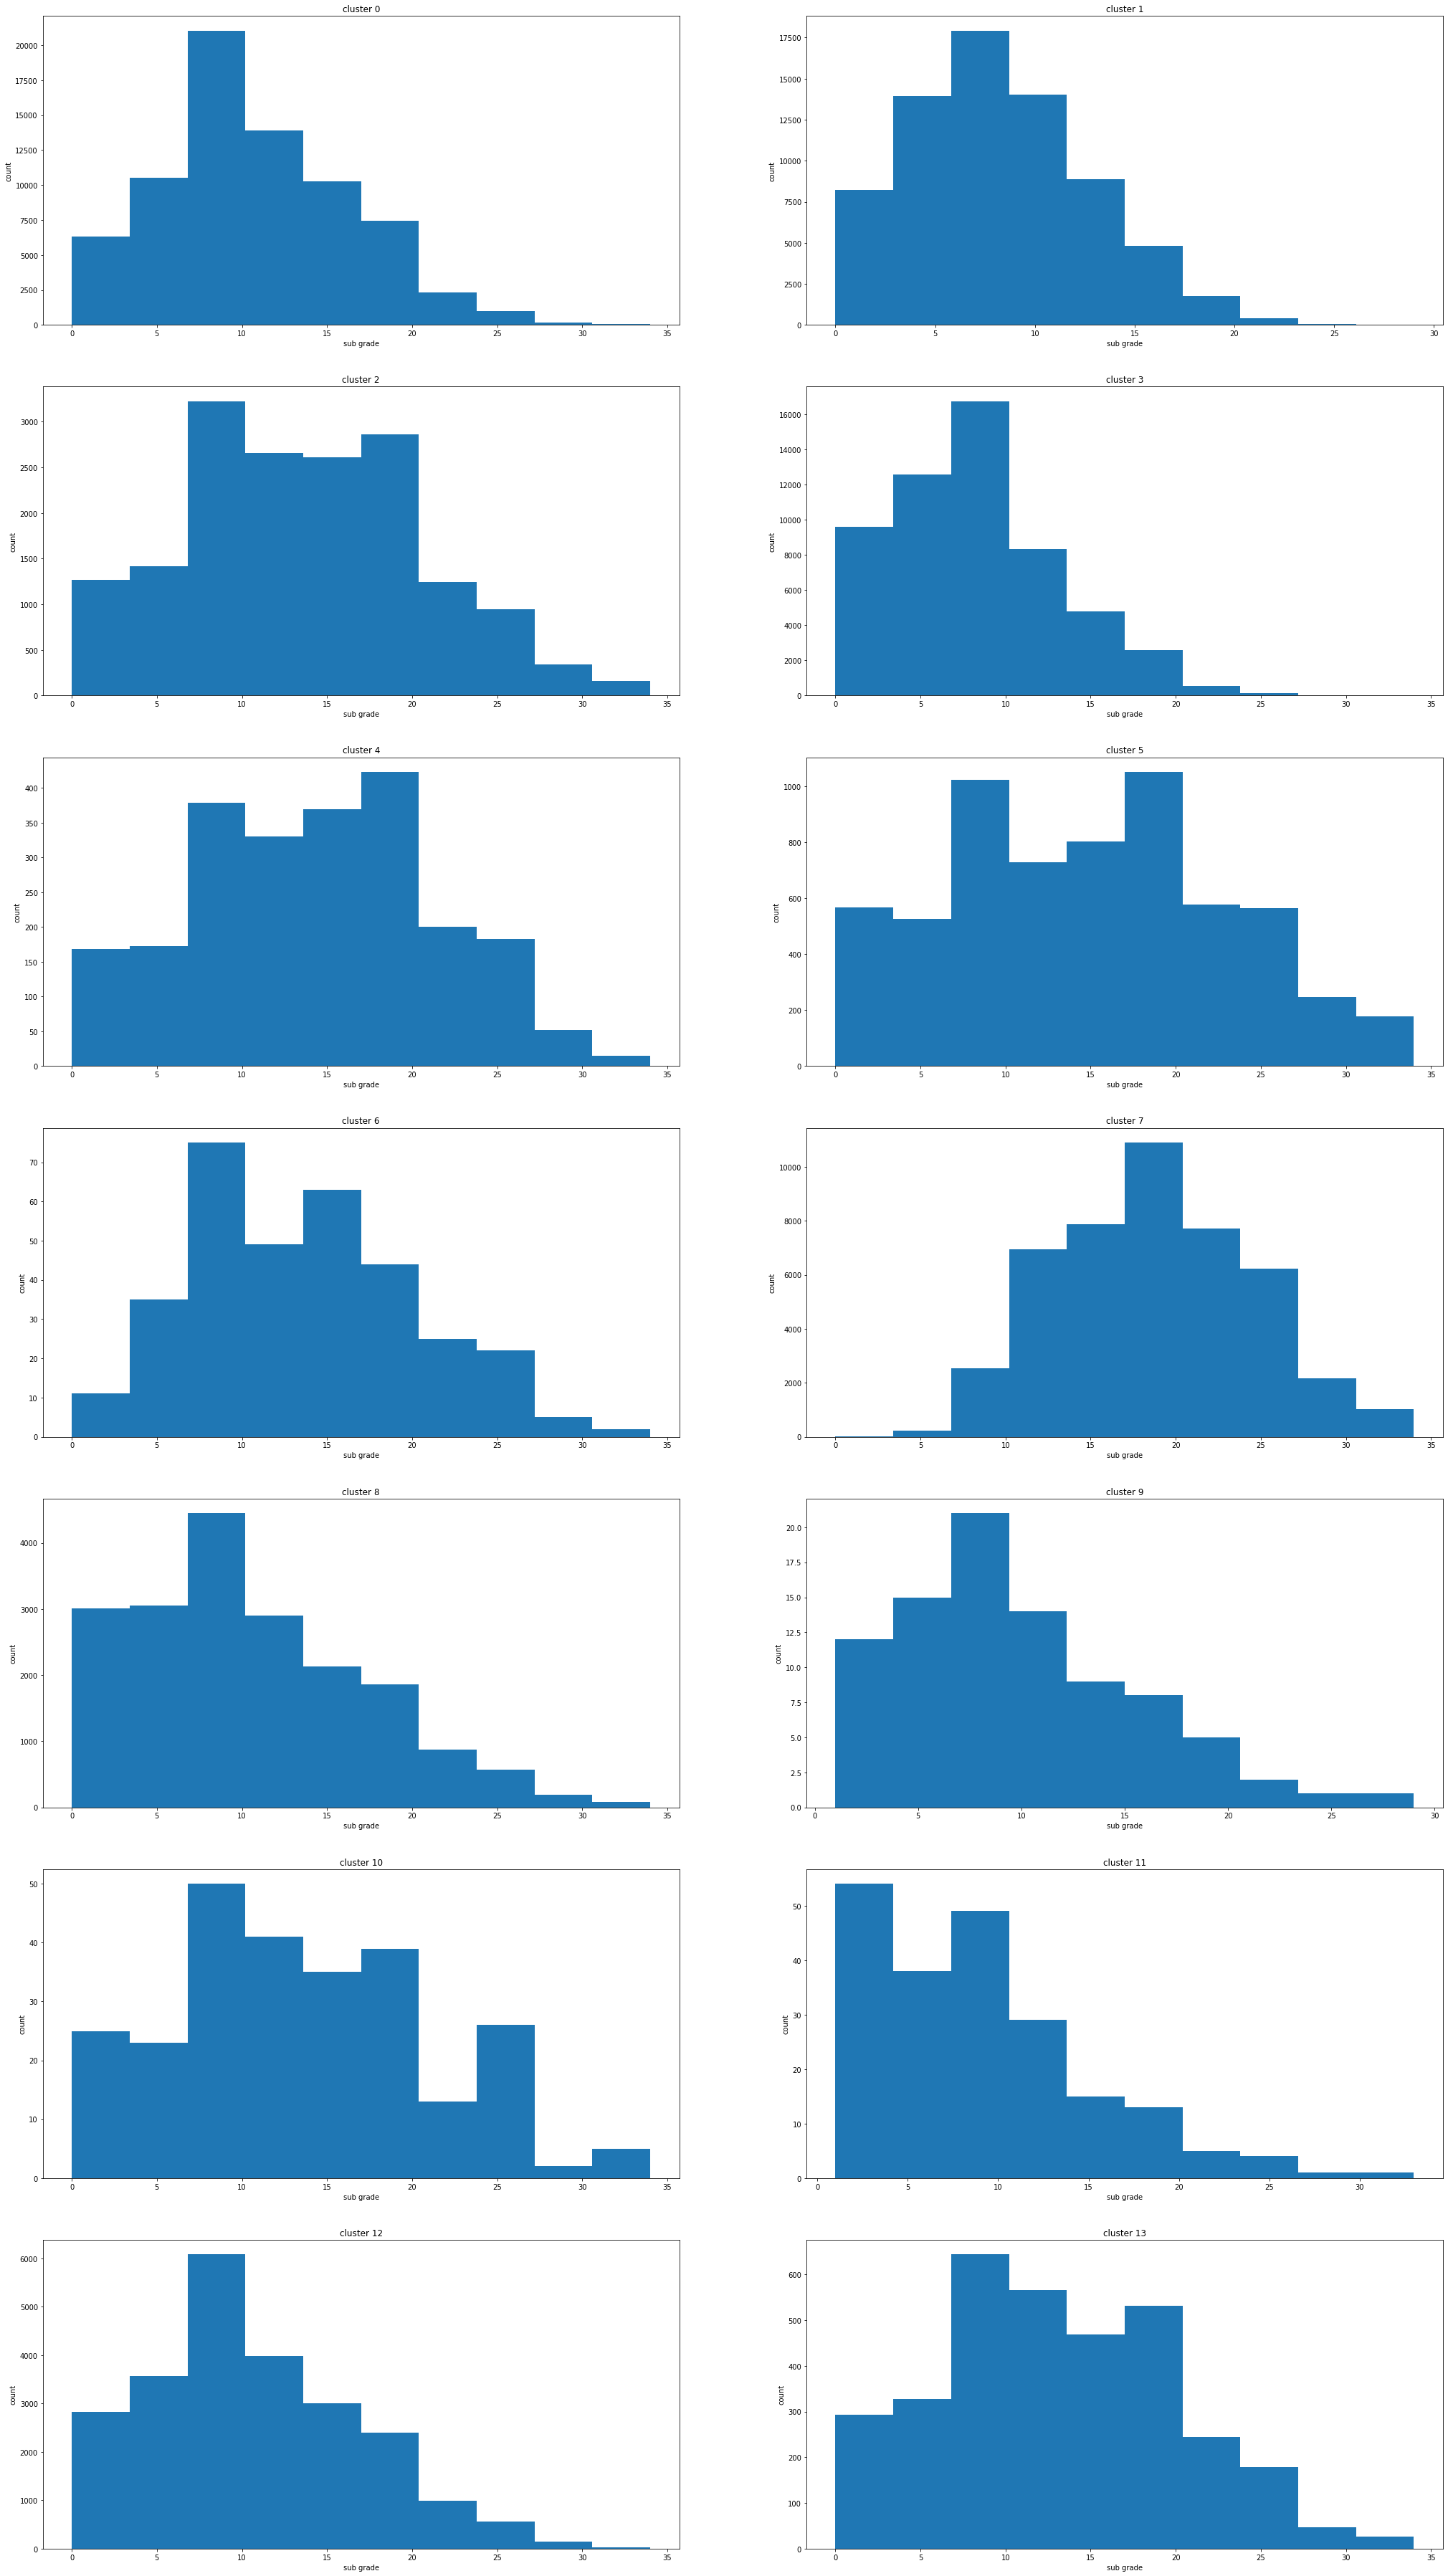

In [ ]:
plt.figure(figsize=(35, 65))
start = 1
for i in sorted(clst_df["cluster"].unique()):
  # if i not in invalid_clsts:
  plt.subplot(7, 2, start)
  start += 1
  plt.hist(clst_df[clst_df["cluster"] == i]["sub_grade"])
  plt.title(f"cluster {i}")
  plt.xlabel("sub grade")
  plt.ylabel("count")

## DBSCAN

In [ ]:
df_sample = pd.DataFrame(X_clst, columns=X_train.columns)
sample = df_sample.sample(frac=0.01, random_state=RAND_SEED)
df_sample

,loan_amnt,term,int_rate,sub_grade,emp_length,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT
0,1.465427,1.792319,1.031325,0.746192,1.148660,-0.250745,-0.312864,-0.536005,0.522247,-0.332368,-0.274359,-1.191019,-0.541144,0.168793,-0.34066,0.997855,-0.009069,-0.016685,-0.32486,-0.821779,-0.705529,1.354008,1.939762,-1.205777,-0.025842,-0.254239,-0.074625,-0.150183,-0.103171,-0.085471,-0.236868,-0.028688,-0.120551,-0.078532,-0.067167,-0.815776,0.042235,-0.032373
1,-0.732606,-0.557936,-0.145197,-0.314989,-0.441967,-0.366811,0.696359,0.714572,-0.451801,-0.332368,-0.374783,0.289650,-0.457088,-0.779452,-0.34066,-1.002150,-0.009069,-0.016685,-0.32486,1.216872,-0.705529,1.354008,-0.515527,0.829341,-0.025842,-0.254239,-0.074625,-0.150183,-0.103171,-0.085471,-0.236868,-0.028688,-0.120551,-0.078532,-0.067167,-0.815776,0.042235,-0.032373
2,-1.258938,-0.557936,1.163292,1.504178,1.148660,0.296424,-0.394898,1.270384,-0.646610,-0.332368,-0.336716,1.418558,-1.129538,-0.779452,-0.34066,-1.002150,-0.009069,-0.016685,-0.32486,1.216872,-0.705529,-0.738548,-0.515527,-1.205777,-0.025842,-0.254239,-0.074625,-0.150183,-0.103171,11.699874,-0.236868,-0.028688,-0.120551,-0.078532,-0.067167,-0.815776,0.042235,-0.032373
3,-1.330710,-0.557936,-0.118356,-0.466586,-0.707072,-0.151260,-0.447056,-1.508676,-0.646610,-0.332368,-0.616227,-1.260553,-1.129538,-0.305329,-0.34066,-1.002150,-0.009069,-0.016685,-0.32486,1.216872,-0.705529,-0.738548,-0.515527,0.829341,-0.025842,-0.254239,-0.074625,-0.150183,-0.103171,-0.085471,-0.236868,-0.028688,-0.120551,-0.078532,-0.067167,-0.815776,0.042235,-0.032373
4,-0.110577,-0.557936,0.749496,0.594595,-1.502386,-0.731590,0.690283,0.714572,-0.256991,1.531792,-0.251529,-0.266624,-0.373032,-0.779452,2.46563,-1.002150,-0.009069,-0.016685,-0.32486,1.216872,1.417376,-0.738548,1.939762,-1.205777,-0.025842,-0.254239,-0.074625,-0.150183,-0.103171,-0.085471,-0.236868,-0.028688,-0.120551,-0.078532,-0.067167,1.225827,0.042235,-0.032373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316170,-1.330710,-0.557936,-1.060020,-1.072975,0.883556,-0.151260,-0.164493,-0.952864,0.327437,-0.332368,0.000430,-0.630655,-0.288976,-0.305329,-0.34066,0.997855,-0.009069,-0.016685,-0.32486,-0.821779,-0.705529,-0.738548,-0.515527,-1.205777,-0.025842,-0.254239,-0.074625,6.658547,-0.103171,-0.085471,-0.236868,-0.028688,-0.120551,-0.078532,-0.067167,-0.815776,0.042235,-0.032373
316171,1.899053,1.792319,-0.272690,-0.466586,1.148660,-0.393340,0.125158,-0.258099,-0.841420,-0.332368,-0.466103,0.072867,-0.288976,-0.779452,-0.34066,-1.002150,-0.009069,-0.016685,-0.32486,1.216872,-0.705529,1.354008,-0.515527,0.829341,-0.025842,-0.254239,-0.074625,-0.150183,-0.103171,-0.085471,-0.236868,-0.028688,-0.120551,-0.078532,-0.067167,-0.815776,0.042235,-0.032373
316172,0.104740,-0.557936,0.141105,-0.011794,0.088242,-0.565781,0.002613,-0.536005,-0.451801,-0.332368,-0.373760,0.952270,0.383474,-0.779452,-0.34066,-1.002150,-0.009069,-0.016685,-0.32486,1.216872,1.417376,-0.738548,-0.515527,0.829341,-0.025842,-0.254239,-0.074625,-0.150183,-0.103171,-0.085471,-0.236868,-0.028688,-0.120551,-0.078532,-0.067167,-0.815776,0.042235,-0.032373
316173,0.403792,-0.557936,-0.440445,-0.466586,-1.502386,-0.101517,-0.638469,-0.258099,-0.841420,-0.332368,-0.444490,-0.536580,-0.036807,3.961772,-0.34066,0.997855,-0.009069,-0.016685,-0.32486,-0.821779

In [ ]:
k_dist = 4
k_dist_arr = []

for i in range(sample.shape[0]):
  dist_arr = []
  for j in range(sample.shape[0]):
    if i != j:
      dist = np.linalg.norm(X_clst[i] - X_clst[j])
      dist_arr.append(dist)
  k_dist_arr.append(sorted(dist_arr)[k_dist - 1])


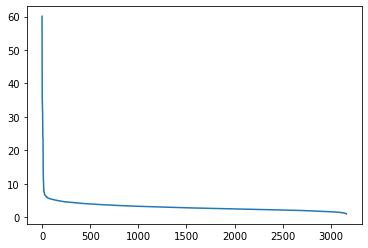

In [ ]:
plt.plot(sorted(k_dist_arr, reverse=True))

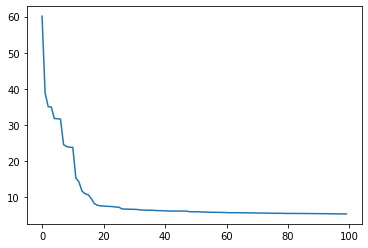

In [ ]:
plt.plot(sorted(k_dist_arr, reverse=True)[:100])

In [ ]:
eps = sorted(k_dist_arr, reverse=True)[20]
print(eps)

# from sklearn.cluster import DBSCAN

# clustering = DBSCAN(eps=eps, min_samples=k_dist).fit(X_clst)
# clusters_dbscan = clustering.labels_.tolist()

# clst_df_dbscan = X_train.copy()
# clst_df_dbscan["cluster"] = clusters_dbscan
# clst_df_dbscan["cluster"].value_counts()

7.618195093403682


In [ ]:
class DBSCAN:
    def region_query (self, p, eps, X):
        '''
        Generates boolean array of all data points which belong
        in epsilon neighborhood of p
        '''
        _, dim = X.shape
        assert (p.shape == (dim,)) or (p.shape == (1, dim)) or (p.shape == (dim, 1))

        return np.linalg.norm (p - X, axis=1) <= eps
    
    def index_set (self, y):
        """
        Given a boolean vector, this function returns
        the indices of all True elements in the outputs
        of the region_query function
        """
        assert len (y.shape) == 1

        return set (np.where (y)[0])
    
    def find_neighbors (self, eps, X):
        """
        Finds epsilon neighbors for all points in the dataset.
        """
        m, d = X.shape
        neighbors = [] # Empty list to start
        
        for i in range (len (X)):
            n_i = self.index_set (self.region_query (X[i, :], eps, X))
            neighbors.append (n_i)
        assert len (neighbors) == m
        return neighbors
    
    def find_core_points (self, s, neighbors):
        """
        checks the neigbors list for each point
        and if density is greater than s then the
        point is added as a core point
        """
        assert type (neighbors) is list
        assert all ([type (n) is set for n in neighbors])

        core_set = set ()
        for i, n_i in enumerate (neighbors):
            if len (n_i) >= s:
                core_set.add (i)
        return core_set
    
    def expand_cluster (self, p, neighbors, core_set, visited, assignment):
        """
        Given a core point for which cluster label has been assigned, the reachable
        points from there is expanded.
        """
        # Assume the caller performs Steps 1 and 2 of the procedure.
        # That means 'p' must be a core point that is part of a cluster.
        assert (p in core_set) and (p in visited) and (p in assignment)

        reachable = set (neighbors[p])  # Step 3
        while reachable:
            q = reachable.pop () # Step 4

            # Put your reordered and correctly indented statements here:
            if q not in visited:
                visited.add (q) # Mark q as visited
                if q in core_set:
                    reachable |= neighbors[q]
            if q not in assignment:
                assignment[q] = assignment[p]
                
    def __call__(self, eps, s, X):
        """
        Function which puts together all the helper function
        and runs the DBSCAN algorithm.
        """
        clusters = []
        point_to_cluster = {}

        neighbors = self.find_neighbors (eps, X)
        core_set = self.find_core_points (s, neighbors)

        assignment = {}
        next_cluster_id = 0

        visited = set ()
        for i in core_set: # for each core point i
            if i not in visited:
                visited.add (i) # Mark i as visited
                assignment[i] = next_cluster_id
                self.expand_cluster (i, neighbors, core_set,
                                visited, assignment)
                next_cluster_id += 1

        return assignment, core_set

In [ ]:
# DONT run the following 3 blocks because it runs out of memory

dbscan = DBSCAN()
assignment, coreset = dbscan(eps, k_dist, df_sample.values)

labels = [-1] * len (X_train.values)
for i, c in assignment.items ():
    labels[i] = c

In [ ]:
dbscan_df = X_train.copy()
dbscan_df["cluster"] = labels
dbscan_df["cluster"].value_counts()

In [ ]:
dbscan_df["cluster"].to_csv('cluster_dbscan_final.csv')

# 5. Classification

In [ ]:
data_num = data.copy()

data_num = data_num.drop(['issue_d', 'installment', 'emp_title', 'title', 'address', 'grade'], axis=1)

data_num.earliest_cr_line = data.earliest_cr_line.apply(lambda x: int(x[-4:]))

data_num.mort_acc.fillna(0, inplace=True)

data_num['zip_code'] = data.address.apply(lambda x: x[-5:])

categories = ['home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type', 'zip_code']
data_num = pd.get_dummies(data_num, columns=categories, drop_first=True)

data_num.term = pd.to_numeric(data.term.astype(str).str.replace(' months', ''))

data_num.sub_grade = data.sub_grade.astype(str).apply(lambda s: (ord(s[0]) - ord('A')) * 5 + int(s[1]) - 1).astype(int)

dct = {}
for i in range(2, 10):
  dct['{} years'.format(i)] = i
dct['< 1 year'] = 0
dct['1 year'] = 1
dct['10+ years'] = 10
dct[np.nan] = 0
data_num.emp_length = data.emp_length.map(dct)

data_num.loan_status = data.loan_status.map({'Fully Paid': 0, 'Charged Off': 1})

In [ ]:
data_num.dtypes

loan_amnt                              float64
term                                     int64
int_rate                               float64
sub_grade                                int64
emp_length                               int64
annual_inc                             float64
loan_status                              int64
dti                                    float64
earliest_cr_line                         int64
open_acc                               float64
pub_rec                                float64
revol_bal                              float64
revol_util                             float64
total_acc                              float64
mort_acc                               float64
pub_rec_bankruptcies                   float64
home_ownership_MORTGAGE                  uint8
home_ownership_NONE                      uint8
home_ownership_OTHER                     uint8
home_ownership_OWN                       uint8
home_ownership_RENT                      uint8
verification_

80/20 Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split

data_train_zip, data_test_zip = train_test_split(data_num.dropna(), test_size=0.2, random_state=RAND_SEED)

In [ ]:
X_train_zip, y_train = data_train_zip.drop('loan_status', axis=1), data_train_zip.loan_status
X_train_bl = X_train_zip.loc[:, ~X_train_zip.columns.str.contains('zip_code')]
X_test_zip, y_test = data_test_zip.drop('loan_status', axis=1), data_test_zip.loan_status
X_test_bl = X_test_zip.loc[:, ~X_test_zip.columns.str.contains('zip_code')]

In [ ]:
X_train_bl.columns

Index(['loan_amnt', 'term', 'int_rate', 'sub_grade', 'emp_length',
       'annual_inc', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Source Verified',
       'verification_status_Verified', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_w',
       'application_type_INDIVIDUAL', 'application_type_JOINT'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'min_samples_split': [2, 5, 10, 20]
}

clf = RandomForestClassifier(random_state=RAND_SEED)
grid_clf = GridSearchCV(clf, param_grid, cv=10)
grid_clf.fit(X_train_bl, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=15524718),
             param_grid={'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [10, 50, 100, 200]})

In [ ]:
grid_clf.best_params_

{'min_samples_split': 10, 'n_estimators': 200}

In [ ]:
param_grid = {
    'eta': [0.05, 0.1, 0.15, 0.2],
    'max_depth': [4, 5, 6, 7]
}

grid_clf_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, random_state=RAND_SEED), param_grid, cv=5)
grid_clf_xgb.fit(X_train_bl, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(random_state=15524718,
                                     use_label_encoder=False),
             param_grid={'eta': [0.05, 0.1, 0.15, 0.2],
                         'max_depth': [4, 5, 6, 7]})

In [ ]:
grid_clf_xgb.best_params_

{'eta': 0.05, 'max_depth': 6}

In [ ]:
rf_clf = RandomForestClassifier(random_state=RAND_SEED, n_estimators=200, min_samples_split=10).fit(X_train_bl, y_train)
xgb_clf = XGBClassifier(use_label_encoder=False, random_state=RAND_SEED, eta=0.05, max_depth=6).fit(X_train_bl, y_train)
log_clf = LogisticRegressionCV(cv=5, random_state=RAND_SEED, max_iter=1000).fit(X_train_bl, y_train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

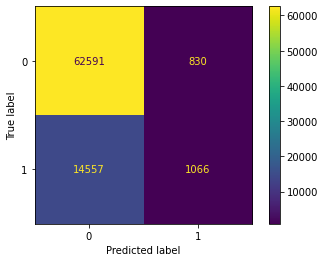

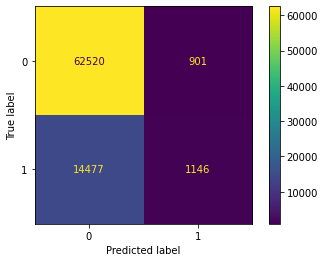

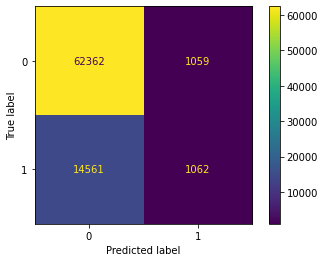

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
for clf, name in zip([rf_clf, xgb_clf, log_clf], ['Random Forest', 'XGBoost', 'Logistic']):
  predictions = clf.predict(X_test_bl)
  cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
  disp.plot()
  plt.savefig('{}_CM.svg'.format(name), format='svg')
  files.download("{}_CM.svg".format(name)) 

In [ ]:
log_clf.C_

array([21.5443469])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

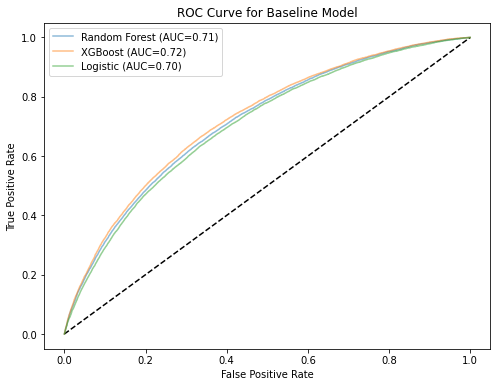

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 100)
plt.figure(figsize=(8, 6))
plt.plot(x, x, 'k--')
for model, name in zip([rf_clf, xgb_clf, log_clf], ['Random Forest', 'XGBoost', 'Logistic']):
  fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_bl)[:, 1])
  roc_auc = metrics.auc(fpr, tpr)
  display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=name)
  plt.plot(fpr, tpr, label="{} (AUC={:.2f})".format(name, roc_auc), alpha=0.5)
plt.title('ROC Curve for Baseline Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('baseline_ROC.svg', format='svg')
files.download("baseline_ROC.svg") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

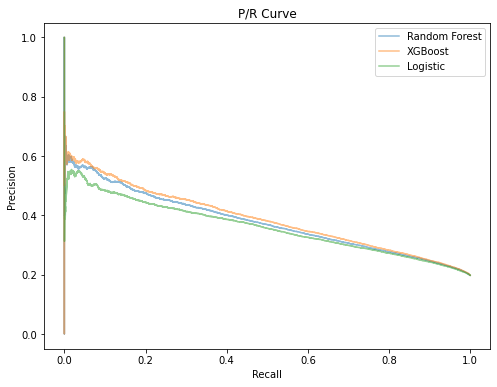

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, rf_clf.predict_proba(X_test_bl)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label="Random Forest", alpha=0.5)
precision, recall, thresholds = precision_recall_curve(y_test, xgb_clf.predict_proba(X_test_bl)[:, 1])
plt.plot(recall, precision, label="XGBoost", alpha=0.5)
precision, recall, thresholds = precision_recall_curve(y_test, log_clf.predict_proba(X_test_bl)[:, 1])
plt.plot(recall, precision, label="Logistic", alpha=0.5)
plt.legend()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('P/R Curve')
plt.savefig('baseline_PR.svg', format='svg')
files.download("baseline_PR.svg") 

# With Zipcode

In [ ]:
rf_clf_zip = RandomForestClassifier(random_state=RAND_SEED, n_estimators=200, min_samples_split=10).fit(X_train_zip, y_train)

In [ ]:
xgb_clf_zip = XGBClassifier(use_label_encoder=False, random_state=RAND_SEED, eta=0.05, max_depth=6).fit(X_train_zip, y_train)

In [ ]:
log_clf_zip = LogisticRegressionCV(cv=5, random_state=RAND_SEED, max_iter=1000).fit(X_train_zip, y_train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

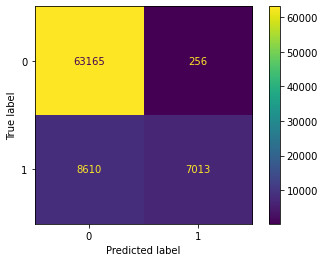

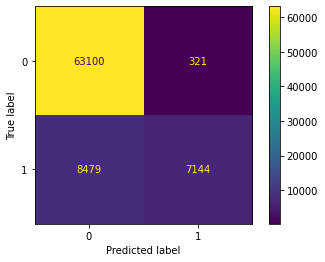

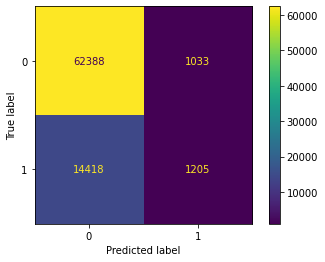

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
for clf, name in zip([rf_clf_zip, xgb_clf_zip, log_clf_zip], ['Random Forest', 'XGBoost', 'Logistic']):
  predictions = clf.predict(X_test_zip)
  cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
  disp.plot()
  plt.savefig('{}_zip_CM.svg'.format(name), format='svg')
  files.download("{}_zip_CM.svg".format(name)) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

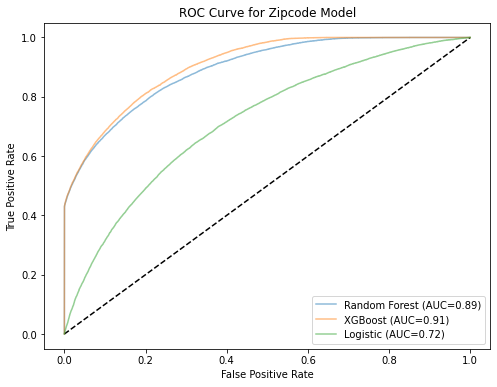

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 100)
plt.figure(figsize=(8, 6))
plt.plot(x, x, 'k--')
for model, name in zip([rf_clf_zip, xgb_clf_zip, log_clf_zip], ['Random Forest', 'XGBoost', 'Logistic']):
  fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_zip)[:, 1])
  roc_auc = metrics.auc(fpr, tpr)
  display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=name)
  plt.plot(fpr, tpr, label="{} (AUC={:.2f})".format(name, roc_auc), alpha=0.5)
plt.title('ROC Curve for Zipcode Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('zipcode_ROC.svg', format='svg')
files.download("zipcode_ROC.svg") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

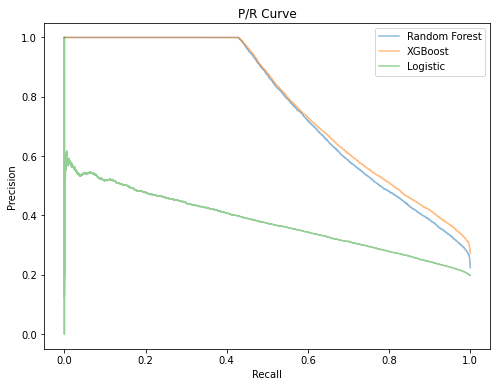

In [ ]:
from sklearn.metrics import precision_recall_curve
plt.figure(figsize=(8, 6))
precision, recall, thresholds = precision_recall_curve(y_test, rf_clf_zip.predict_proba(X_test_zip)[:, 1])
plt.plot(recall, precision, label="Random Forest", alpha=0.5)
precision, recall, thresholds = precision_recall_curve(y_test, xgb_clf_zip.predict_proba(X_test_zip)[:, 1])
plt.plot(recall, precision, label="XGBoost", alpha=0.5)
precision, recall, thresholds = precision_recall_curve(y_test, log_clf_zip.predict_proba(X_test_zip)[:, 1])
plt.plot(recall, precision, label="Logistic", alpha=0.5)
plt.legend()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('P/R Curve')
plt.savefig('zipcode_PR.svg', format='svg')
files.download("zipcode_PR.svg") 

# With Clustering

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

cluster = pd.read_csv('/content/drive/My Drive/DS-GA 1001/Capstone Project/cluster_new.csv', index_col=0)

Mounted at /content/drive


In [ ]:
X_train_cl = pd.merge(X_train_bl, cluster, left_index=True, right_index=True)

In [ ]:
X_train_cl.columns

Index(['loan_amnt', 'term', 'int_rate', 'sub_grade', 'emp_length',
       'annual_inc', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Source Verified',
       'verification_status_Verified', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_w',
       'application_type_INDIVIDUAL', 'application_type_JOINT', 'cluster'],
      dtype='object')

In [ ]:
X_test_cl = pd.read_csv('/content/drive/My Drive/DS-GA 1001/Capstone Project/X_test_cl_new.csv', index_col=0)

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# neigh = KNeighborsClassifier(n_neighbors=5).fit(X_train_cl.drop('cluster', axis=1), X_train_cl.cluster)
# test_cl = neigh.predict(X_test_bl)

# X_test_cl = X_test_bl.copy()
# X_test_cl['cluster'] = test_cl.tolist()
# X_test_cl = pd.get_dummies(X_test_cl, columns=['cluster'], drop_first=True)

# X_test_cl.to_csv('/content/drive/My Drive/DS-GA 1001/Capstone Project/X_test_cl_new.csv')

In [ ]:
X_train_cl = pd.get_dummies(X_train_cl, columns=['cluster'], drop_first=True)

In [ ]:
X_test_cl.columns

Index(['loan_amnt', 'term', 'int_rate', 'sub_grade', 'emp_length',
       'annual_inc', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Source Verified',
       'verification_status_Verified', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_w',
       'application_type_INDIVIDUAL', 'application_type_JOINT', 'cluster_1',
       'cluster_2', 'cluster_3', 'cluster_4', 'cluster_5', 'cluster_6',
       'cluster_7', 'cluster_8', 'cluster_11', 'cluster_12

In [ ]:
X_test_cl.insert(46, 'cluster_9', np.zeros_like(X_test_cl.cluster_8))
X_test_cl.insert(47, 'cluster_10', np.zeros_like(X_test_cl.cluster_8))

In [ ]:
X_test_cl.columns

Index(['loan_amnt', 'term', 'int_rate', 'sub_grade', 'emp_length',
       'annual_inc', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Source Verified',
       'verification_status_Verified', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_w',
       'application_type_INDIVIDUAL', 'application_type_JOINT', 'cluster_1',
       'cluster_2', 'cluster_3', 'cluster_4', 'cluster_5', 'cluster_6',
       'cluster_7', 'cluster_8', 'cluster_9', 'cluster_10'

In [ ]:
rf_clf_cl = RandomForestClassifier(random_state=RAND_SEED, n_estimators=200, min_samples_split=10).fit(X_train_cl, y_train)
xgb_clf_cl = XGBClassifier(use_label_encoder=False, random_state=RAND_SEED, eta=0.05, max_depth=6).fit(X_train_cl, y_train)
log_clf_cl = LogisticRegressionCV(cv=5, random_state=RAND_SEED, max_iter=1000).fit(X_train_cl, y_train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

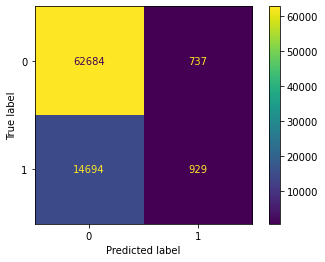

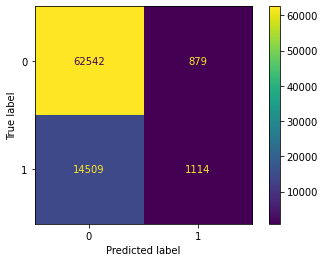

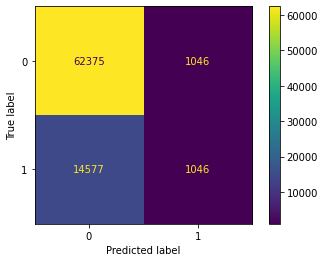

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
for clf, name in zip([rf_clf_cl, xgb_clf_cl, log_clf_cl], ['Random Forest', 'XGBoost', 'Logistic']):
  predictions = clf.predict(X_test_cl)
  cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
  disp.plot()
  plt.savefig('{}_cl_CM.svg'.format(name), format='svg')
  files.download("{}_cl_CM.svg".format(name)) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

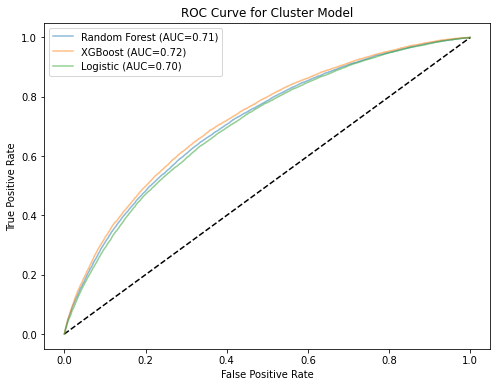

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 100)
plt.figure(figsize=(8, 6))
plt.plot(x, x, 'k--')
for model, name in zip([rf_clf_cl, xgb_clf_cl, log_clf_cl], ['Random Forest', 'XGBoost', 'Logistic']):
  fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_cl)[:, 1])
  roc_auc = metrics.auc(fpr, tpr)
  display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=name)
  plt.plot(fpr, tpr, label="{} (AUC={:.2f})".format(name, roc_auc), alpha=0.5)
plt.title('ROC Curve for Cluster Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('cluster_ROC.svg', format='svg')
files.download("cluster_ROC.svg") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

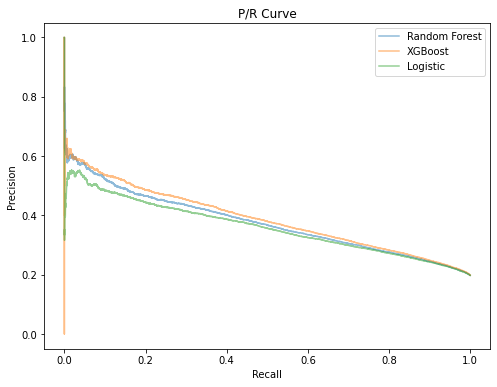

In [ ]:
from sklearn.metrics import precision_recall_curve
plt.figure(figsize=(8, 6))
precision, recall, thresholds = precision_recall_curve(y_test, rf_clf_cl.predict_proba(X_test_cl)[:, 1])
plt.plot(recall, precision, label="Random Forest", alpha=0.5)
precision, recall, thresholds = precision_recall_curve(y_test, xgb_clf_cl.predict_proba(X_test_cl)[:, 1])
plt.plot(recall, precision, label="XGBoost", alpha=0.5)
precision, recall, thresholds = precision_recall_curve(y_test, log_clf_cl.predict_proba(X_test_cl)[:, 1])
plt.plot(recall, precision, label="Logistic", alpha=0.5)
plt.legend()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('P/R Curve')
plt.savefig('cluster_PR.svg', format='svg')
files.download("cluster_PR.svg") 